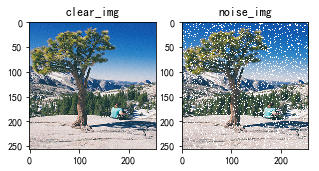

In [17]:
# 下面代码是添加椒盐噪声的！！！

import numpy as np
import random
import imageio
from matplotlib import pyplot as plt

def salt_noise(image,prob):
    """
    添加椒噪声
    image:输入的图像，np.array类型
    prob: 噪声比例
    """
    output = np.zeros(image.shape,np.uint8)

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rand_val = random.random()

            if rand_val < prob:
                output[i][j] = 255
                
            else:
                output[i][j] = image[i][j]

    return output

def pepper_noise(image,prob):
    """
    添加椒噪声
    image:输入的图像，np.array类型
    prob: 噪声比例
    """

    output = np.zeros(image.shape,np.uint8)

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rand_val = random.random()

            if rand_val < prob:
                output[i][j] = 0
                
            else:
                output[i][j] = image[i][j]

    return output



if __name__ == "__main__":
    clear_img = np.array(imageio.imread("data/tree.jpg"))
    img = cv2.resize(clear_img, (256, 256))
    imageio.imwrite("data/clear.jpg", img)
    plt.figure(figsize=(5, 2.5))
    
    plt.subplot(1, 2, 1)
    plt.title("clear_img")
    plt.imshow(img)
    
    s_img = salt_noise(img, 0.1)
    imageio.imwrite("data/noise.jpg", s_img)
    plt.subplot(1, 2, 2)
    plt.title("noise_img")
    plt.imshow(s_img)
    
    
    plt.savefig("pepper_noise.png")
    plt.show()
    

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as ttf
clear_img = Image.open("data/clear.jpg")
noise_img = Image.open("data/noise.jpg")

In [2]:
def erase(img, position, size):
    """
    按照指定的位置和长宽擦除
    :param position: 擦除的左上角坐标
    :param size: 擦除的长宽值
    :return: 返回擦除后的图像
    """
    img = ttf.to_tensor(img)
    erased_image = ttf.to_pil_image(ttf.erase(img=img,
                            i=position[0],
                            j=position[1],
                            h=size[0],
                            w=size[1],
                            v=1))
    return erased_image

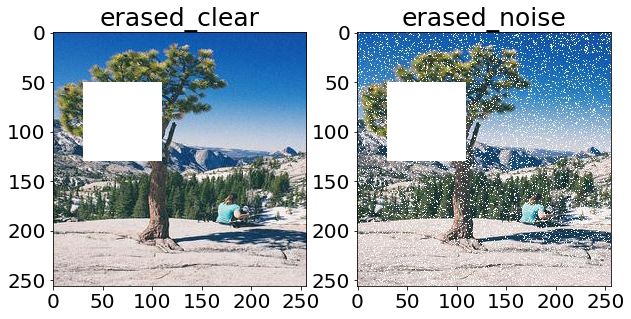

In [3]:
erased_clear = erase(clear_img, [50, 30], [80, 80])
erased_noise = erase(noise_img, [50, 30], [80, 80])
image_list = [erased_clear, erased_noise]
title_list = ["erased_clear", "erased_noise"]

plt.figure(figsize=(10, 5))
for i in range(2): 
    plt.subplot(1, 2, i+1)
    # 设置坐标轴字体刻度
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title_list[i], fontsize=25)
    plt.imshow(np.array(image_list[i]))
plt.savefig("earse.png", dpi=500, bbox_inches="tight")
plt.show()

In [4]:
def rotate(img, angle):
    """
    :param img: 输入图像
    :param angle: 需要对输入图像进行多少角度的旋转
    :return: 旋转后的图像
    """
    r_img = ttf.rotate(img=img, angle=angle, resample=Image.NEAREST)
    return r_img 

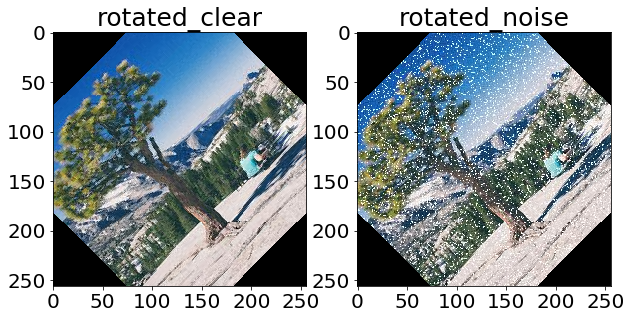

In [5]:
rotated_clear = rotate(clear_img, 45)
rotated_noise = rotate(noise_img, 45)
image_list = [rotated_clear, rotated_noise]
title_list = ["rotated_clear", "rotated_noise"]

plt.figure(figsize=(10, 5))
for i in range(2): 
    plt.subplot(1, 2, i+1)
    # 设置坐标轴字体刻度
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title_list[i], fontsize=25)
    plt.imshow(np.array(image_list[i]))
plt.savefig("rotate.png", dpi=500, bbox_inches="tight")
plt.show()